In [1]:
import shap
import xgboost

In [2]:
import pickle

In [3]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('/var/www/html/fyp/Training Dataset.arff')
df = pd.DataFrame(data[0])
df=df.astype('int')

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df=df.drop(['port','on_mouseover','popUpWidnow','Page_Rank','Links_pointing_to_page','Statistical_report'],axis=1)

In [5]:
y=pd.DataFrame(df['Result'])
X=df.drop(['Result'],axis=1)

In [6]:
X=X[:].values
y=y[:].values

In [7]:
model=xgboost.XGBClassifier()

In [8]:
model.load_model('xgbmodel')

In [9]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

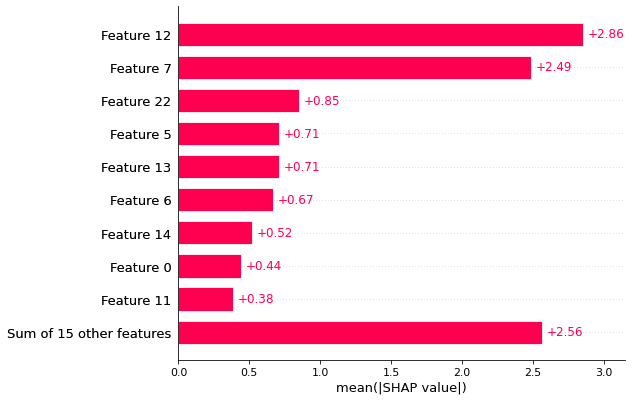

In [10]:
shap.plots.bar(shap_values)